<a href="https://colab.research.google.com/github/MisbahNaeem/Fashion-MNIST/blob/master/Copy_of_CNN_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The project is about training a Convolutional Neural Network using using CIFAR images.The project is using CIFAR10 dataset which is available on https://www.cs.toronto.edu/~kriz/cifar.html.
This project has been completed with the help of tutorail available at site https://www.tensorflow.org/tutorials/images/cnn under the supervision of Mr.Muhammad Ali Shafique(lecturer EED,UET Lahore).
Project is solved by Misbah Naeem (2017-EE-152) on Google Colab.


In [0]:
pip uninstall tensorflow 

Uninstalling tensorflow-2.2.0rc4:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0rc4.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0rc4


In [0]:
pip install tensorflow==2.1.0

**Import TensorFlow**

In [0]:

import tensorflow as tf
from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)

2.1.0


**Download and prepare CIFAR10 dataset from** https://www.cs.toronto.edu/~kriz/cifar.html

The dataset contain 60,000 images in 10 classes so each class contain 6,000 images.The dataset is divided into two parts:50,000 train images and 10,000 test images.

In [0]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()


170500096/170498071 [==============================] - 11s 0us/step


In [0]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

**Explore Data**

In [0]:
test_images.shape

(10000, 32, 32, 3)

In [0]:
len(train_images)

50000

In [0]:
len(test_images)

10000

In [0]:
len(train_labels)

50000

In [0]:
train_labels.shape

(50000, 1)

**PreProcess the Data**

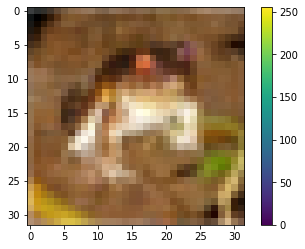

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()


**Normalize Pixels between 0 and 1**

In [0]:
train_images=train_images/255
test_images=test_images/255

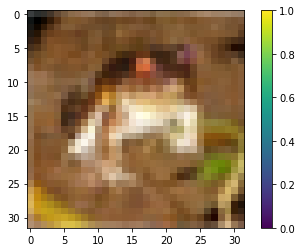

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()

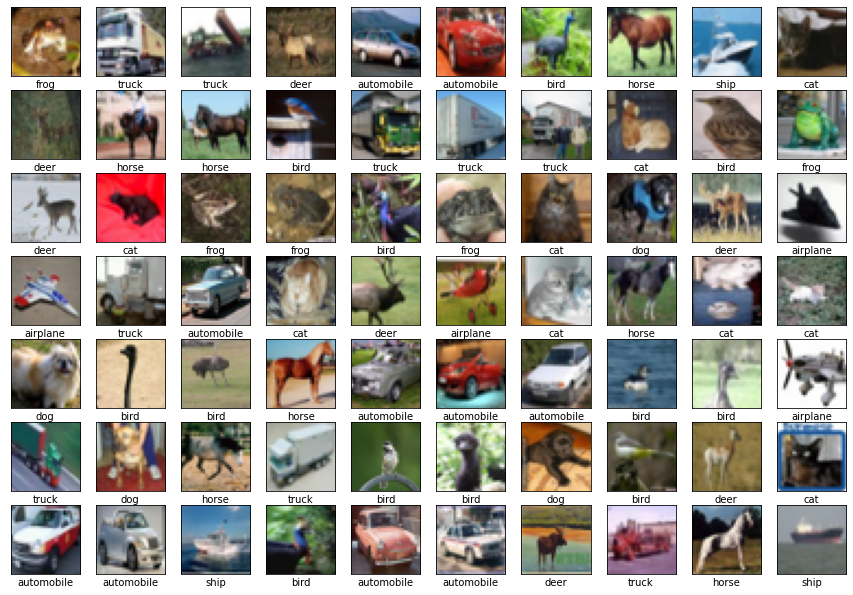

In [0]:
plt.figure(figsize=(15,15))
for i in range (70):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**Build the Convoluional Base** 

The code below is buiding the Convolutinal layers:a stack of **Conv2D** and **Maxpooling2D**.
As input CNN takes tensor of images(x,y,nc) in which **x** is **image height**,**y** is **image width** and last one is **color channels** whch is 3 as imagex are **R,G,B** . 

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


**Add Dense Layer on Top**

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

**Compile the Model**

In [0]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.1605 - accuracy: 0.9434 - val_loss: 2.0555 - val_accuracy: 0.6915
Epoch 2/10
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.1448 - accuracy: 0.9499 - val_loss: 2.1015 - val_accuracy: 0.6885
Epoch 3/10
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.1483 - accuracy: 0.9465 - val_loss: 2.1026 - val_accuracy: 0.6845
Epoch 4/10
50000/50000 [==============================] - 71s 1ms/sample - loss: 0.1444 - accuracy: 0.9489 - val_loss: 2.1801 - val_accuracy: 0.6880
Epoch 5/10
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.1386 - accuracy: 0.9517 - val_loss: 2.2234 - val_accuracy: 0.6879
Epoch 6/10
50000/50000 [==============================] - 71s 1ms/sample - loss: 0.1366 - accuracy: 0.9532 - val_loss: 2.2746 - val_accuracy: 0.6850
Epoch 7/10
50000/50000 [==============================] 

**Evalute Accuracy**

In [0]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('\nTest Accuracy:',test_acc)
print("\nTest Loss:",test_loss)

10000/10000 [==============================] - 5s 461us/sample - loss: 2.3156 - accuracy: 0.6907

Test Accuracy: 0.6907

Test Loss: 2.3156392053604127


In [0]:
probability_model=tf.keras.Sequential([model,
                                       tf.keras.layers.Softmax()])

In [0]:
predictions=probability_model.predict(test_images)
print(predictions[1])

[1.3138606e-07 1.5739203e-06 5.1472451e-20 5.1336599e-26 5.3985664e-21
 1.6126117e-28 8.9586076e-28 1.6236968e-22 9.9999833e-01 2.6606310e-08]


In [0]:
np.argmax(predictions[1])

8

**Evaluate Model**

10000/10000 - 4s - loss: 2.3156 - accuracy: 0.6907


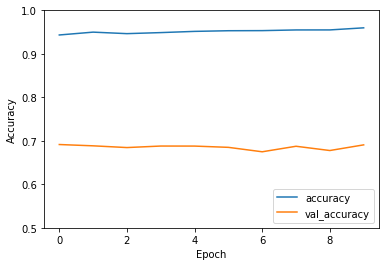

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)